# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 11</center>

# <center>Machine Learning Pipeline</center>

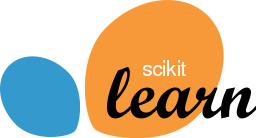

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Implement machine learning pipeline with sklearn and save pipeline model.

By the end of the lab, you should be able to :
- Implement preprocessing steps with machine learning pipeline.
    

- Train pipeline model
    
    
- Save model




## <font color = blue>1. Loading Data

    - Lets load Credit card dataset 
    
    
Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
    

In [1]:
#import libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Load datasets
columns = ["A1",'A2','A3','A4',"A5",'A6','A7','A8',"A9",'A10','A11','A12',"A13",'A14','A15','target']
df = pd.read_csv("creditcard.txt",names = columns)
df.head()

A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 target
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  00202    0      +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g  00043  560      +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  00280  824      +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  00100    3      +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  00120    0      +

## <font color = blue> 2. Data manipulation with pandas
    
- Convert special character into np.nan
    
    
    
- Ensure all the columns are in expected types.

In [3]:
df.replace("?",np.nan,inplace=True)
df.isna().sum()

A1        12
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
target     0
dtype: int64

In [4]:
df.dtypes

A1         object
A2         object
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14        object
A15         int64
target     object
dtype: object

In [5]:
df['A2'] = df['A2'].astype('float64')
df['A14'] = df['A14'].astype('float64')
df.dtypes

A1         object
A2        float64
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14       float64
A15         int64
target     object
dtype: object

## <font color = blue> 3. Split dataset


1.   Split the data to 80% training and 20% testing
2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`


In [6]:
from sklearn.model_selection import train_test_split

# Before splitting the data, lets choose any one feature as X
X = df.iloc[:,:-1]
y = df.target

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5,stratify=y)
X_train.head()

A1     A2      A3 A4 A5 A6 A7     A8 A9 A10  A11 A12 A13    A14    A15
49   b  23.92   0.665  u  g  c  v  0.165  f   f    0   f   g  100.0      0
74   b  44.83   7.000  y  p  c  v  1.625  f   f    0   f   g  160.0      2
245  b  33.17   3.040  y  p  c  h  2.040  t   t    1   t   g  180.0  18027
600  a  29.50   0.460  u  g  k  v  0.540  t   t    4   f   g  380.0    500
313  a  18.58  10.000  u  g  d  v  0.415  f   f    0   f   g   80.0     42

## <font color = blue> 4. Feature engineering with pipeline


In [7]:
#Pipeline is to create a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
#for each option in the categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [30]:
#Separate the Categorical and Numerical Columns
#Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')
Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object')


###### `class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)`

`steps = list of (name,transform) tuple `

In [9]:
#Building the Numeric Transformation Pipeline
n_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [10]:
#Building the Numeric Transformation Pipeline
c_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])

`class sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', 
sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False,
verbose_feature_names_out=True)`

`transformers: List of (name, transformer, columns) tuples specifying the 
transformer objects to be applied to subsets of the data.`

In [11]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,numeric_cols),
                           ('categoric',c_transformer,categorical_cols)
                       ])

In [12]:
#Create estimator
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree')

In [13]:
#add estimator to pipeline
mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [14]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object'))])),
                ('est',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3,
                                      weights='distance'))])

## <font color=blue> 5.Validation and Evaluation

In [15]:
#Import all the metrics for validation and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [16]:
#find y_hat for your test data

y_hat = mymodel.predict(X_test)

<AxesSubplot:>

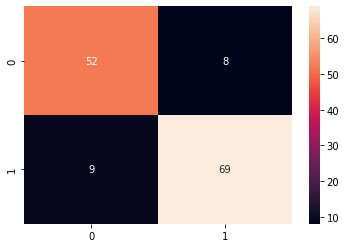

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_hat,y_test),annot=True)

In [18]:
#Summarise the fit of the model
report = classification_report(y_test, y_hat)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

           +       0.87      0.85      0.86        61
           -       0.88      0.90      0.89        77

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



## <font color=blue> 6. Make Prediction for unknown sample
    

In [19]:
sample = X_test.iloc[0:1,:]
sample

A1    A2    A3 A4  A5  A6 A7   A8 A9 A10  A11 A12 A13    A14     A15
317  b  17.5  22.0  l  gg  ff  o  0.0  f   f    0   t   p  450.0  100000

In [20]:
mymodel.predict(sample)[0]

'+'

## <font color=blue> 7. Saving Machine Learning Model
    


In [21]:
import pickle
#save model 
pickle.dump(mymodel,open("mymodel.pkl","wb"))

In [22]:
#load model

model = pickle.load(open("mymodel.pkl","rb"))

In [23]:
model.score(X_test,y_test)

0.8768115942028986

## <font color=blue> 8. Hyperparamter Tuning
    
Note that we use automated process of tuning the hyperparameters of the estimator

1. Choose an estimator (KNeigborClassifier)
2. Check the documentation of that estimator for available hyperparameters for tuning
3. Use a list to generate different values of parameters
4. Use an automated process (GridSearchCV, RandomSearchCV) to hunt down the best model


In [24]:
from sklearn.model_selection import GridSearchCV

#Parameters to hypertune for KNeighborClassifier

n_neighbors_param = list(range(3,17,2))
# print(n_neighbors_param)
leaf_size_param = list(range(30,60,10))
weights_param = ['uniform', 'distance']
algorithm_param =['auto', 'ball_tree', 'kd_tree', 'brute']

#Pack these params into a dictionary

grid_params_knn = [
  {
    'est__n_neighbors' : n_neighbors_param,
    'est__leaf_size'   : leaf_size_param,  
    'est__weights'     : weights_param,
    'est__algorithm'   : algorithm_param,
  }
]

gs_knn_pipeline = GridSearchCV(estimator=mymodel,
                               param_grid = grid_params_knn,
                               scoring = 'accuracy',
                               cv = 10
                               )

#Fit the GridSearchCV to find the best model from the hyperparameter tuning
gs_models = gs_knn_pipeline.fit(X_train, y_train)

In [25]:
gs_models.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'], dtype='object'))])),
                ('est', KNeighborsClassifier(n_neighbors=7))])

['+' '-' '-' '-' '-' '-' '-' '-' '+' '-' '-' '-' '-' '+' '+' '+' '+' '-'
 '+' '+' '+' '-' '-' '-' '-' '-' '-' '-' '-' '+' '-' '+' '+' '+' '-' '+'
 '+' '-' '-' '-' '-' '-' '-' '+' '-' '-' '-' '-' '+' '+' '-' '-' '-' '-'
 '-' '+' '-' '+' '-' '-' '-' '-' '+' '-' '+' '-' '-' '-' '+' '-' '-' '+'
 '+' '-' '-' '-' '+' '+' '+' '-' '-' '-' '+' '+' '+' '-' '-' '-' '-' '-'
 '-' '+' '+' '-' '+' '+' '-' '+' '-' '-' '-' '-' '+' '+' '-' '+' '+' '+'
 '+' '+' '-' '-' '+' '-' '-' '+' '+' '-' '-' '+' '+' '-' '+' '+' '+' '-'
 '+' '+' '+' '-' '-' '+' '+' '-' '-' '-' '+' '+']
Report : 
              precision    recall  f1-score   support

           Y       0.90      0.85      0.87        61
           N       0.89      0.92      0.90        77

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138



<AxesSubplot:>

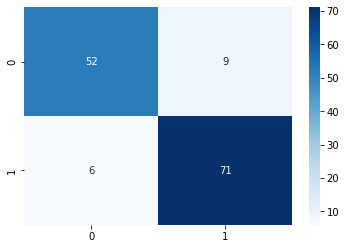

In [26]:
y_pred = gs_models.best_estimator_.predict(X_test)
print(y_pred)

#Summarise the fit of the model
report = classification_report(y_test, y_pred, target_names=['Y','N'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

In [27]:
pickle.dump(gs_models.best_estimator_,open("gsmodel.pkl",'wb'))

In [28]:
gsmodel = pickle.load(open("gsmodel.pkl",'rb'))

In [29]:
gsmodel.predict(sample)

array(['+'], dtype=object)

# TODO Create Pipeline model for loan dataset following same procedure as above.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
idf = pd.read_csv('loan_train.csv')
idf.replace("?",np.nan,inplace=True)
idf.isna().sum()
df

A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15  \
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0    0   
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0  560   
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0  824   
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0    3   
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0    0   
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...   
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0    0   
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0  394   
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0    1   
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0  750   
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0    0   

    target  
0        +  
1        +  
2        +  
3        +  
4        +  
..     ...  
685      -  
686      -  
687      -  
688      -  
689      -  

[690 rows x 16 columns]

In [103]:
from sklearn.model_selection import train_test_split

# Before splitting the data, lets choose any one feature as X
x = idf.iloc[:,:-1]
Y = idf.Loan_Status

#Split the data into training and testing sets
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.2,random_state=5)
x_train.head()

Loan_ID  Gender Married Dependents     Education Self_Employed  \
488  LP002555    Male     Yes          2      Graduate           Yes   
510  LP002637    Male      No          0  Not Graduate            No   
419  LP002347    Male     Yes          0      Graduate            No   
323  LP002055  Female      No          0      Graduate            No   
313  LP002008    Male     Yes          2      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
488             4583             2083.0       160.0             360.0   
510             3598             1287.0       100.0             360.0   
419             3246             1417.0       138.0             360.0   
323             3166             2985.0       132.0             360.0   
313             5746                0.0       144.0              84.0   

     Credit_History Property_Area  
488             1.0     Semiurban  
510             1.0         Rural  
419             1.0     Semiurban  
323             NaN         Rural  
313             NaN         Rural

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [105]:
num_cols = x.select_dtypes(include=['int64','float64']).columns
print(num_cols)

#categorical columns
# cat_cols = x.select_dtypes(include=['object']).columns
# print(cat_cols)
one = idf[['Gender','Married','Education','Self_Employed']]

onehot_col = one.select_dtypes(include=['object']).columns
print(onehot_col)

ordinal = idf[['Property_Area']]

ordinal_col = ordinal.select_dtypes(include=['object']).columns
print(ordinal_col)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Education', 'Self_Employed'], dtype='object')
Index(['Property_Area'], dtype='object')


In [106]:
numerical_transformer = Pipeline(steps=
                       [
                           ('Nimpute',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [107]:
onehot_transformer = Pipeline(steps=
                       [
                           ('Cimpute',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])

In [108]:
ordinal_transformer = Pipeline(steps=
                       [
                           ('Oimpute',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('ordinal',OrdinalEncoder(handle_unknown='error'))
                       ])

In [109]:
from sklearn.compose import ColumnTransformer

In [137]:
prepro = ColumnTransformer(transformers=
                       [
                           ('numeric',numerical_transformer,num_cols),
                           ('onehot_categoric',onehot_transformer,onehot_col),
                           ('ordinal_categoric',ordinal_transformer,ordinal_col)
                       ])

In [138]:
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier(criterion='gini', max_depth=6 )


In [139]:
MyModel = Pipeline(steps = 
                  [
                      ('pre',prepro),
                      ('est',est)  
                  ])

In [140]:
from sklearn import set_config
set_config(display='diagram')
MyModel.fit(x_train,Y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('Nimpute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('onehot_categoric',
                                                  Pipeline(steps=[('Cimpute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constan...,
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Education', 'Self_Employed'], dtype='object')),
                                                 ('ordinal_categoric',
                                                  Pipeline(steps=[('Oimpute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Property_Area'], dtype='object'))])),
                ('est', DecisionTreeClassifier(max_depth=6))])

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [115]:
y_predict = MyModel.predict(x_test)

<AxesSubplot:>

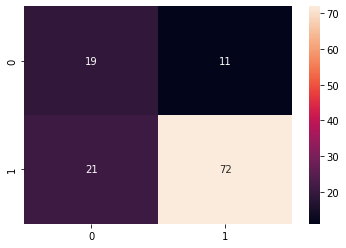

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_predict,Y_test),annot=True)

In [117]:
report = classification_report(Y_test, y_predict)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

           N       0.63      0.47      0.54        40
           Y       0.77      0.87      0.82        83

    accuracy                           0.74       123
   macro avg       0.70      0.67      0.68       123
weighted avg       0.73      0.74      0.73       123



In [126]:
samp = x_test.iloc[0:1,:]
samp
# idf.Loan_Status

Loan_ID Gender Married Dependents     Education Self_Employed  \
504  LP002619   Male     Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
504             3814             1483.0       124.0             300.0   

     Credit_History Property_Area  
504             1.0     Semiurban

In [127]:
MyModel.predict(samp)[0]

'Y'

In [120]:
import pickle
#save model 
pickle.dump(MyModel,open("MyModel.pkl","wb"))

In [121]:
model1 = pickle.load(open("MyModel.pkl","rb"))

In [96]:
model1.score(x_test,Y_test)

0.7398373983739838

In [148]:
from sklearn.model_selection import GridSearchCV

#Parameters to hypertune for KNeighborClassifier

# print(n_components )
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

# Pack these params into a dictionary

grid_params = [
  {
        "est__criterion":criterion,
        "est__max_depth":max_depth
  }
]

gs_dtree_pipeline = GridSearchCV(estimator=MyModel,
                               param_grid = grid_params,
                               scoring = 'accuracy',
                               cv = 10
                               )

#Fit the GridSearchCV to find the best model from the hyperparameter tuning


In [150]:
gs_model = gs_dtree_pipeline.fit(x_train, Y_train)

In [151]:
gs_model.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('Nimpute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('onehot_categoric',
                                                  Pipeline(steps=[('Cimpute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constan...,
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Education', 'Self_Employed'], dtype='object')),
                                                 ('ordinal_categoric',
                                                  Pipeline(steps=[('Oimpute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Property_Area'], dtype='object'))])),
                ('est', DecisionTreeClassifier(max_depth=2))])

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y']
Report : 
              precision    recall  f1-score   support

           Y       0.86      0.45      0.59        40
           N       0.78      0.96      0.86        83

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123



<AxesSubplot:>

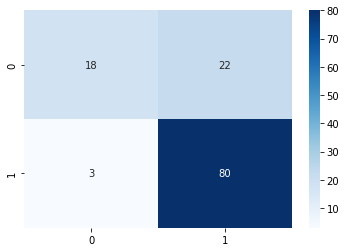

In [155]:
y_predi = gs_model.best_estimator_.predict(x_test)
print(y_predi)

#Summarise the fit of the model
report = classification_report(Y_test, y_predi, target_names=['Y','N'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(Y_test, y_predi)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

In [156]:
pickle.dump(gs_model.best_estimator_,open("gsmodel.pkl",'wb'))

In [158]:
gsmodel1 = pickle.load(open("gsmodel.pkl",'rb'))

In [160]:
gsmodel1.predict(samp)

array(['Y'], dtype=object)